# Case Study : Logistic Regresion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/Adultall1.csv')
data

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [3]:
data.shape


(32561, 15)

In [4]:
data.describe()

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


[Text(0, 0, ' Bachelors'),
 Text(1, 0, ' HS-grad'),
 Text(2, 0, ' 11th'),
 Text(3, 0, ' Masters'),
 Text(4, 0, ' 9th'),
 Text(5, 0, ' Some-college'),
 Text(6, 0, ' Assoc-acdm'),
 Text(7, 0, ' Assoc-voc'),
 Text(8, 0, ' 7th-8th'),
 Text(9, 0, ' Doctorate'),
 Text(10, 0, ' Prof-school'),
 Text(11, 0, ' 5th-6th'),
 Text(12, 0, ' 10th'),
 Text(13, 0, ' 1st-4th'),
 Text(14, 0, ' Preschool'),
 Text(15, 0, ' 12th')]

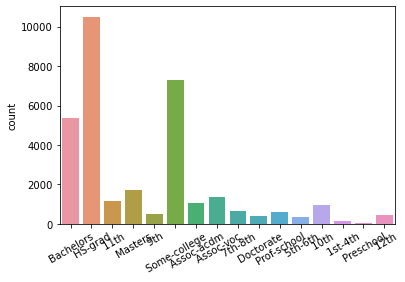

In [9]:
import seaborn as sns
ax=sns.countplot(x=data.EDUCATION.values,data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30 )

[Text(0, 0, ' State-gov'),
 Text(1, 0, ' Self-emp-not-inc'),
 Text(2, 0, ' Private'),
 Text(3, 0, ' Federal-gov'),
 Text(4, 0, ' Local-gov'),
 Text(5, 0, ' ?'),
 Text(6, 0, ' Self-emp-inc'),
 Text(7, 0, ' Without-pay'),
 Text(8, 0, ' Never-worked')]

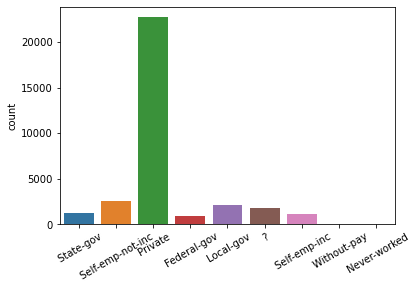

In [10]:
bx=sns.countplot(x=data.WORKCLASS.values,data=data)
bx.set_xticklabels(bx.get_xticklabels(),rotation=30 )

In [11]:
data.isnull().sum()

AGE              0
WORKCLASS        0
FNLWGT           0
EDUCATION        0
EDUCATIONNUM     0
MARITALSTATUS    0
OCCUPATION       0
RELATIONSHIP     0
RACE             0
SEX              0
CAPITALGAIN      0
CAPITALLOSS      0
HOURSPERWEEK     0
NATIVECOUNTRY    0
ABOVE50K         0
dtype: int64

In [12]:
data.dropna(how='all')

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [13]:
data.shape

(32561, 15)

In [14]:
X=data.iloc[:,12].values
y=data.iloc[:,-1].values

In [15]:
X


array([40, 13, 40, ..., 40, 20, 40], dtype=int64)

In [16]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [23]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
model=classifier.fit(X_train,y_train)

In [24]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[4798,  120],
       [1530,   65]], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

0.7466605251036389

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      4918
           1       0.35      0.04      0.07      1595

    accuracy                           0.75      6513
   macro avg       0.55      0.51      0.46      6513
weighted avg       0.66      0.75      0.66      6513



<AxesSubplot:xlabel='HOURSPERWEEK', ylabel='ABOVE50K'>

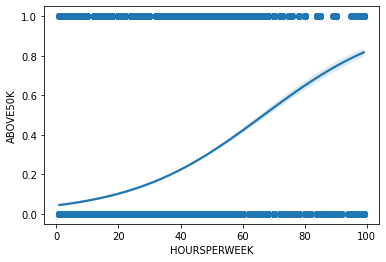

In [31]:
plt.scatter(data['HOURSPERWEEK'],data['ABOVE50K'])
sns.regplot(x='HOURSPERWEEK',y='ABOVE50K',data=data,logistic=True)